### Lab Exercise 1: Data Preparation and Explorations 

In [28]:
# Import necessary libraries
import pandas as pd
from IPython.display import display 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 1. Load and combine these data files to formulate a single dataset

In [2]:
# define the path to read the csv files
path = "Data"

In [3]:
# access all the csv files 
csv_flies = glob.glob(path+"/*.csv")

In [4]:
for csv in csv_flies:
#   read the csv files
    df = pd.read_csv(csv)
#   check the column names (any extra white space)
    print(df.columns)
#   display the dataframe
    display(df.head(5))

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')


,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')


,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


Index(['year', 'country', 'avg_temp'], dtype='object')


,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [5]:
df_all = []
for csv in csv_flies:
#   read the csv files
    df = pd.read_csv(csv)
#   remove the extra white space in the column names and convert to lower case
    df  = df.rename(columns= lambda x : x.strip().lower())
#   rename the column names which are common to merge the dataset
    df.rename(columns={"country":"area"}, inplace =True)
#   append to the list
    df_all.append(df)

In [6]:
# check the number of dataframes in the list
len(df_all)

4

In [7]:
# check the shape of each dataframe
for df in df_all:
    print(df.shape)

(4349, 7)
(6727, 3)
(71311, 3)
(56717, 12)


- There are four different datasets in the given directory
- Each dataset has different shape (number of rows and columns)
- The common variables for all these four datasets are "Country (or Area)" and "Year". Based on these common variable, the datasets will be merged.

In [8]:
# merge all dataframes
df_merge = df_all[0]

for i in range(1,len(df_all)):
    df_merge = pd.merge(df_merge, df_all[i], on =["area","year"])

In [9]:
# shape of the merged dataframe
df_merge.shape

(28248, 19)

In [10]:
df_merge.head(5)

,domain_x,area,element_x,item_x,year,unit_x,value_x,average_rain_fall_mm_per_year,avg_temp,domain code,domain_y,area code,element code,element_y,item code,item_y,year code,unit_y,value_y
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0,1485,16.37,QC,Crops,3,5419,Yield,56,Maize,1990,hg/ha,36613
1,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0,1485,16.37,QC,Crops,3,5419,Yield,116,Potatoes,1990,hg/ha,66667
2,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0,1485,16.37,QC,Crops,3,5419,Yield,27,"Rice, paddy",1990,hg/ha,23333
3,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0,1485,16.37,QC,Crops,3,5419,Yield,83,Sorghum,1990,hg/ha,12500
4,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0,1485,16.37,QC,Crops,3,5419,Yield,236,Soybeans,1990,hg/ha,7000


In [11]:
# display the columns in the merged dataframe
df_merge.columns

Index(['domain_x', 'area', 'element_x', 'item_x', 'year', 'unit_x', 'value_x',
       'average_rain_fall_mm_per_year', 'avg_temp', 'domain code', 'domain_y',
       'area code', 'element code', 'element_y', 'item code', 'item_y',
       'year code', 'unit_y', 'value_y'],
      dtype='object')

#### 2. Prepare the dataset for further explorations 

##### a. Drop unnecessary features 

In [12]:
# copy the merged dataframe to df_new for further analysis
df_new = df_merge.copy()

In [13]:
# delete the columns which have only one value (or category)
# because it does not give any information for further analysis
for col in df_new.columns:
    if df_new[col].nunique() == 1:
        del df_new[col]
    # print("The column {} has {} unique values".format(col, df_merge[col].nunique()))

In [14]:
df_new.head()

,area,year,value_x,average_rain_fall_mm_per_year,avg_temp,area code,item code,item_y,year code,value_y
0,Albania,1990,121.0,1485,16.37,3,56,Maize,1990,36613
1,Albania,1990,121.0,1485,16.37,3,116,Potatoes,1990,66667
2,Albania,1990,121.0,1485,16.37,3,27,"Rice, paddy",1990,23333
3,Albania,1990,121.0,1485,16.37,3,83,Sorghum,1990,12500
4,Albania,1990,121.0,1485,16.37,3,236,Soybeans,1990,7000


In [15]:
# delete the following columns
# area code - we already have the area name (and by looking at the area code we cant understand anything)
# year code - this is same as the year
# item code - we already have the item name

column_delete = ["area code","year code", "item code"]
df_new.drop(column_delete, axis=1, inplace=True)

In [16]:
# rename the following columns to have the meaning (for instead value_x and value_y are confusing)
# value_x = value_pesticides
# value_y = value_crops
# item_y = item_crops

rename_column = {"value_x":"value_pesticides_tones", "value_y":"crops_yield_hg/ha","item_y":"item_crops"}
df_new.rename(columns =rename_column, inplace=True)

In [17]:
df_new

,area,year,value_pesticides_tones,average_rain_fall_mm_per_year,avg_temp,item_crops,crops_yield_hg/ha
0,Albania,1990,121.00,1485,16.37,Maize,36613
1,Albania,1990,121.00,1485,16.37,Potatoes,66667
2,Albania,1990,121.00,1485,16.37,"Rice, paddy",23333
3,Albania,1990,121.00,1485,16.37,Sorghum,12500
4,Albania,1990,121.00,1485,16.37,Soybeans,7000
...,...,...,...,...,...,...,...
28243,Zimbabwe,2013,2550.07,657,19.76,"Rice, paddy",22581
28244,Zimbabwe,2013,2550.07,657,19.76,Sorghum,3066
28245,Zimbabwe,2013,2550.07,657,19.76,Soybeans,13142
28246,Zimbabwe,2013,2550.07,657,19.76,Sweet potatoes,22222


##### b. Perform descriptive analytics 

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   area                           28248 non-null  object 
 1   year                           28248 non-null  int64  
 2   value_pesticides_tones         28248 non-null  float64
 3   average_rain_fall_mm_per_year  28248 non-null  object 
 4   avg_temp                       28248 non-null  float64
 5   item_crops                     28248 non-null  object 
 6   crops_yield_hg/ha              28248 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ MB


- The finalized dataset has seven variables.
- But variable "average_rain_fall_mm_per_year" should be int


In [19]:
df_new["average_rain_fall_mm_per_year"].unique()

array(['1485', '89', '1010', '591', '562', '534', '1110', '447', '..',
       '1292', '83', '2666', '618', '847', '416', '1761', '608', '748',
       '1274', '1604', '537', '1342', '1522', '3240', '1113', '703',
       '1410', '2274', '51', '1784', '383', '626', '536', '867', '700',
       '1187', '652', '1996', '1651', '2387', '1440', '1976', '589',
       '1083', '2702', '216', '1118', '832', '2051', '1668', '250', '630',
       '641', '661', '788', '56', '656', '1513', '1181', '2875', '282',
       '92', '2041', '758', '241', '346', '1032', '285', '1500', '778',
       '1732', '2280', '151', '1414', '494', '3142', '1738', '600', '854',
       '74', '637', '1212', '59', '686', '1162', '495', '636', '1712',
       '2331', '624', '1537', '691', '1622', '207', '593', '1180', '565',
       '1220', '1300', '1020', '657'], dtype=object)

- There is an invalid character in the variable average_rain_fall_mm_per_year 

In [20]:
# get the number of datapoints with that invalid character
len(df_new[df_new["average_rain_fall_mm_per_year"]==".."])

6

- There are only 6 records are having invalid data ("..") out of 28248. 
- So deleting this 6 records not have much influence on the dataset. 
- But for this assignment, try to keep those value and impute those values

In [43]:
# replace those invalid characters into np.nan
df_new["average_rain_fall_mm_per_year"] = df_new["average_rain_fall_mm_per_year"].replace("..",np.nan)

In [ ]:
# the data type of the variable "average_rain_fall_mm_per_year" should be numeric (int or float)
# so, change the data type

df_new["average_rain_fall_mm_per_year"] = df_new["average_rain_fall_mm_per_year"].astype(float)

In [47]:
# explore the datapints with above nan values
df_new[df_new["average_rain_fall_mm_per_year"].isnull()]

,area,year,value_pesticides_tones,average_rain_fall_mm_per_year,avg_temp,item_crops,crops_yield_hg/ha
1986,Bahamas,1990,484.59,NaN,25.74,Cassava,106667
1987,Bahamas,1990,484.59,NaN,25.74,Maize,15000
1988,Bahamas,1990,484.59,NaN,25.74,Sweet potatoes,38118
1989,Bahamas,1991,484.59,NaN,25.66,Cassava,100000
1990,Bahamas,1991,484.59,NaN,25.66,Maize,16667
1991,Bahamas,1991,484.59,NaN,25.66,Sweet potatoes,31385


In [49]:
df_new[(df_new["area"]=="Bahamas") & (df_new["year"]==1990)]

,area,year,value_pesticides_tones,average_rain_fall_mm_per_year,avg_temp,item_crops,crops_yield_hg/ha
1986,Bahamas,1990,484.59,NaN,25.74,Cassava,106667
1987,Bahamas,1990,484.59,NaN,25.74,Maize,15000
1988,Bahamas,1990,484.59,NaN,25.74,Sweet potatoes,38118


In [50]:
df_new[(df_new["area"]=="Bahamas") & (df_new["year"]==1991)]

,area,year,value_pesticides_tones,average_rain_fall_mm_per_year,avg_temp,item_crops,crops_yield_hg/ha
1989,Bahamas,1991,484.59,NaN,25.66,Cassava,100000
1990,Bahamas,1991,484.59,NaN,25.66,Maize,16667
1991,Bahamas,1991,484.59,NaN,25.66,Sweet potatoes,31385


In [51]:
# dataframe of area==Bahamas
df_bahamas = df_new[(df_new["area"]=="Bahamas")]

In [53]:
df_bahamas["average_rain_fall_mm_per_year"].mean()

1292.0

In [59]:
mean_bahamas = df_bahamas["average_rain_fall_mm_per_year"].mean()

- As per the above dataframes, we observed that , for the country Bahamas both the years (1990 and 1991) are nan values (missing value)
- Therefore, consider the mean of value of average_rain_fall_mm_per_year for Bahamas to impute those null value

In [60]:
df_new["average_rain_fall_mm_per_year"]  = df_new["average_rain_fall_mm_per_year"].fillna(mean_bahamas)

In [54]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   area                           28248 non-null  object 
 1   year                           28248 non-null  int64  
 2   value_pesticides_tones         28248 non-null  float64
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   avg_temp                       28248 non-null  float64
 5   item_crops                     28248 non-null  object 
 6   crops_yield_hg/ha              28248 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [62]:
# perform descriptive analysis for numerical and categorical variables separately. 

numerical_feature = df_new.select_dtypes(exclude="object")
categorical_feature = df_new.select_dtypes(include="object")

In [63]:
numerical_feature.describe()

,year,value_pesticides_tones,average_rain_fall_mm_per_year,avg_temp,crops_yield_hg/ha
count,28248.000000,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,37069.136973,1149.086342,20.543722,77047.863282
std,7.052997,59954.787836,709.739817,6.311828,84950.194454
min,1990.000000,0.040000,51.000000,1.300000,50.000000
25%,1995.000000,1695.710000,593.000000,16.710000,19918.750000
50%,2001.000000,17517.760000,1083.000000,21.510000,38295.000000
75%,2008.000000,48687.880000,1668.000000,26.000000,104598.250000
max,2013.000000,367778.000000,3240.000000,30.650000,501412.000000


- In year,
    - The spread in low(std = 7)
    - No outliers (mean and median are almost same)
    - No missing values (count is same as the length of the dataframe)

- In value_pesticides, 
    - The spread in high( range = 367778 - 0.04)
    - There are outliers (mean and median are different)
    - No missing values (count is same as the length of the dataframe)
- In average_rain_fall_mm_per_year,
    - the spread in high( range = 3240 - 51 and std = 709)
    - there are few outliers (mean and  median are slightly different (1149,1083))
    - No missing values (count is same as the length of the dataframe)
- In avg_temp,
    - The spread in low( range = 30-1.3 and std = 6.3)
    - Low propobility for outliers (mean and  median are almost same (20.5,21.5))
    - No missing values (count is same as the length of the dataframe)
- In value_crops,
    - The spread in high( range = 501412 - 50 and std = 84956)
    - There are outliers (mean and median are different (77053,38295)
    - No missing values (count is same as the length of the dataframe)   
    

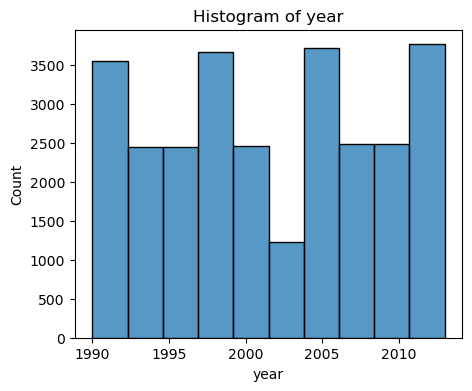

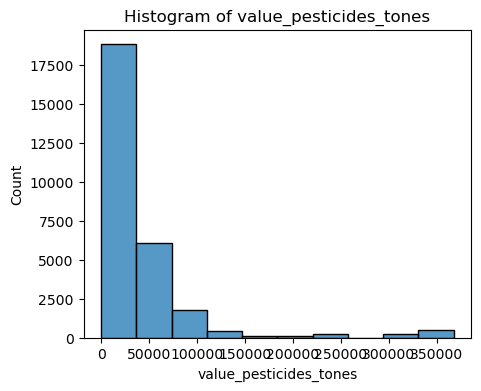

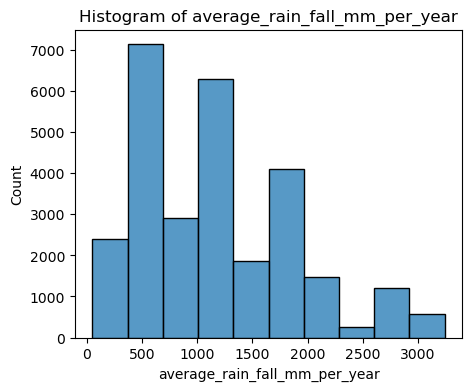

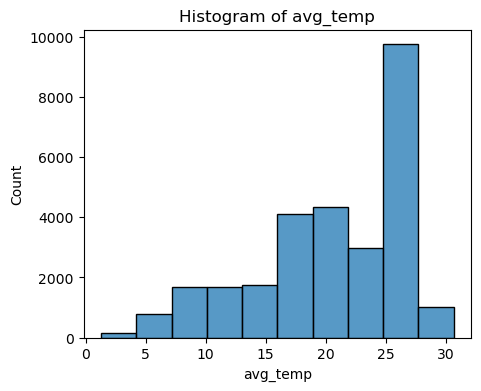

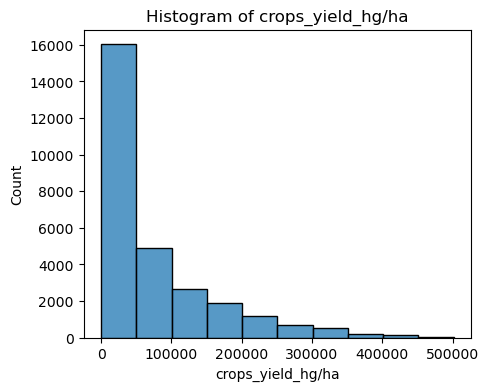

In [64]:
for col in numerical_feature.columns:
    plt.figure(figsize=(5,4))
    sns.histplot(data = numerical_feature, x = col, bins =10)
    plt.title("Histogram of {}".format(col))
    plt.show()
    

- From the above histograms,
    - Year - It's more likely to be a uniform distribution and No outliers
    - value_pesticides - positively skewed with more outliers with the larger values in right side
    - value_crops - positively skewed with more outliers
    - average_rain_fall_mm_per_year - No outliersand 
    - avg_temp - cant see the outliers clearly, need to be examined in below section
    

In [65]:
categorical_feature.describe()

,area,item_crops
count,28248,28248
unique,101,10
top,India,Potatoes
freq,4048,4276


- In area,
    - There are 101 unique countries
    - Among all other countries India has more frequency (mode)
    - No missing values (count is same as the length of the dataframe)
    
- In item_crops,
    - There are 110 unique countries
    - Among all other item_crops Potatoes has more frequency (mode)
    - No missing values (count is same as the length of the dataframe)

##### c. Check & correct for data quality issues


##### i. Missing values,

In [66]:
df_new.isnull().sum()

area                             0
year                             0
value_pesticides_tones           0
average_rain_fall_mm_per_year    0
avg_temp                         0
item_crops                       0
crops_yield_hg/ha                0
dtype: int64

- No missing values in the finilized dataframe

##### ii. Outliers

In [67]:
for col in numerical_feature.columns:
    q1 = df_new[col].quantile(0.25)
    q3 = df_new[col].quantile(0.75)
    iqr = q3-q1
    
    lower_bound = q1-1.5*iqr
    upper_bound = q3 + 1.5*iqr
    # print(lower_bound, upper_bound)
    
    df_ = df_new[(df_new[col]>upper_bound) | (df_new[col]<lower_bound)]
    if len(df_)> 0:
        print("{} has {} outliers".format(col, len(df_)))
    else:
        print("No outliers in {}".format(col))

No outliers in year
value_pesticides_tones has 1418 outliers
No outliers in average_rain_fall_mm_per_year
avg_temp has 34 outliers
crops_yield_hg/ha has 2059 outliers


- As observed in the discriptive statistics, 
    - year and average_rain_fall_mm_per_year have no outliers
    - avg_tem has only few outliers
    - value_pesticides and value_crops have more outliers

##### iii. Irregular cardinality 

In [119]:
for col in categorical_feature.columns:
    print("Categorical feature {} has {} unique categories ".format(col,categorical_feature[col].nunique()))

Categorical feature area has 101 unique categories 
Categorical feature item_crops has 10 unique categories 


- As per the above unique values in area (counrty) and item_crops can be valid.
- So there is no irregular cardinality

#### 3. Explore the dataset for relationships / correlations amongst the features

#### 3.1 Relationship between numerical features

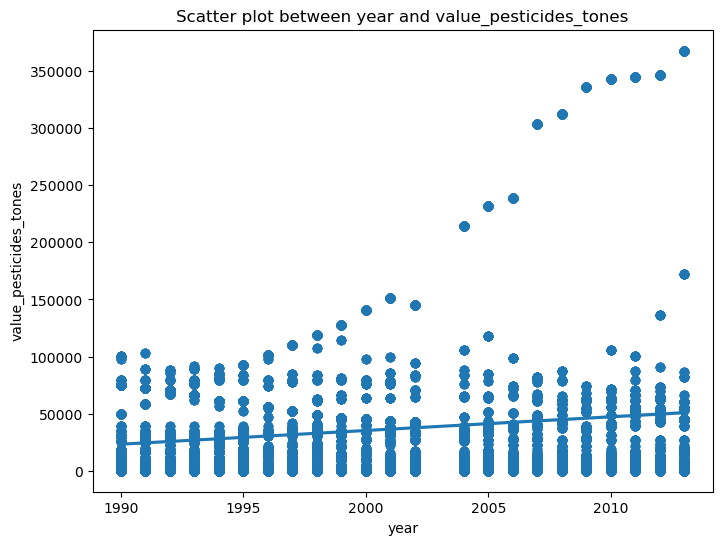

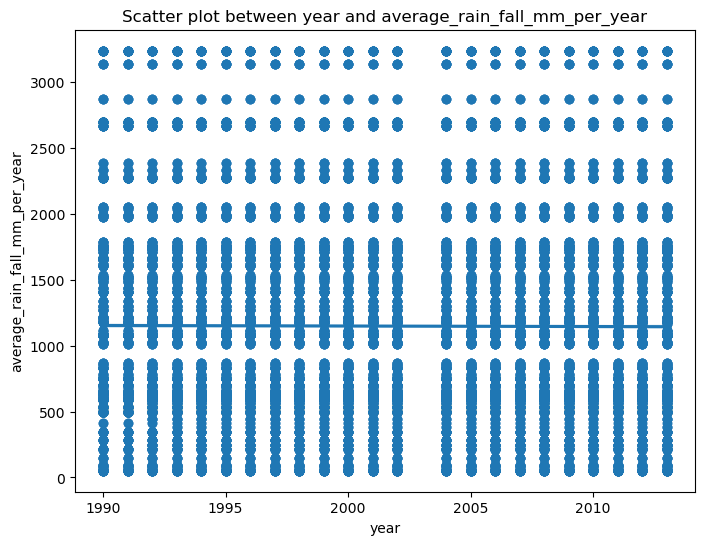

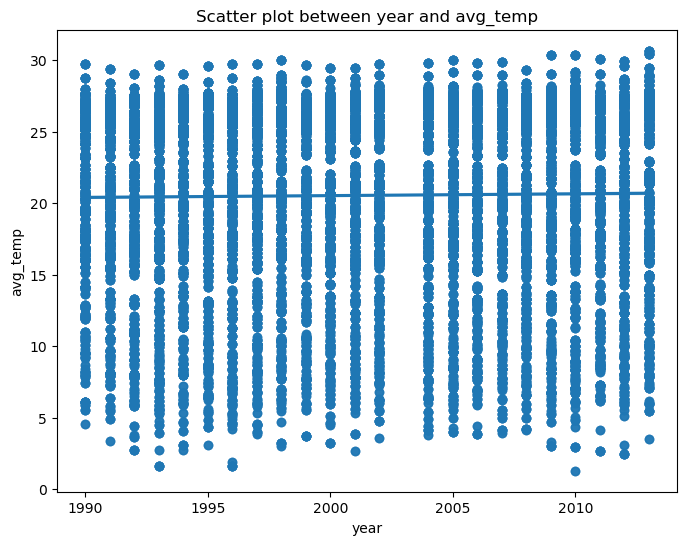

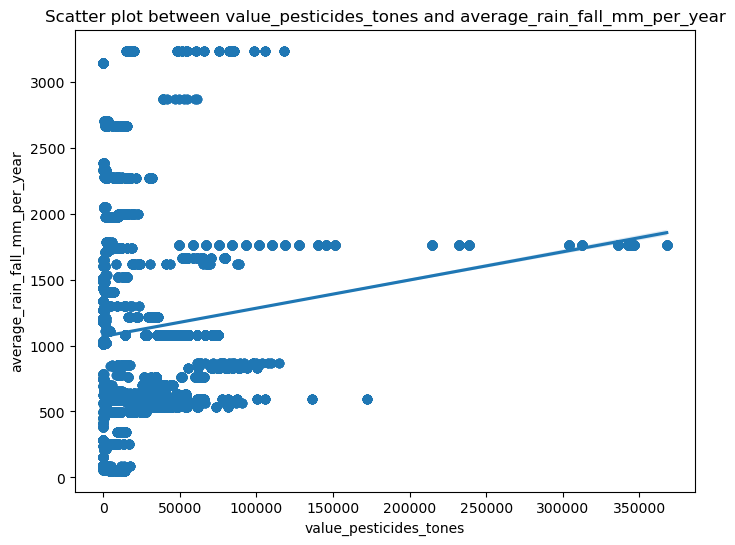

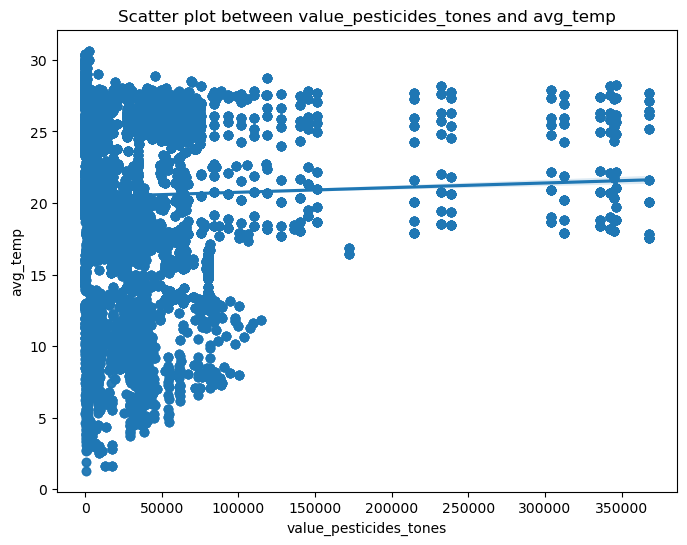

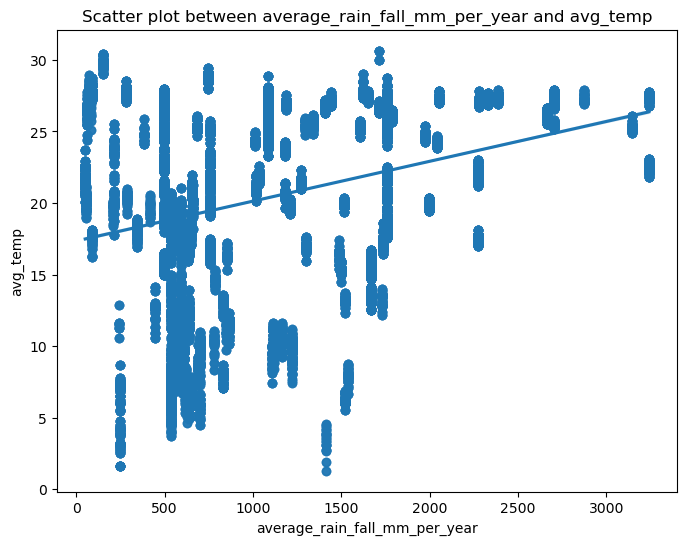

In [68]:
for i in range(0, len(numerical_feature.columns)-1):
    for j in range(i+1,len(numerical_feature.columns)-1):
        plt.figure(figsize=(8, 6))  
        sns.regplot(data=numerical_feature, x=numerical_feature.columns[i], y=numerical_feature.columns[j])
        plt.title(f"Scatter plot between {numerical_feature.columns[i]} and {numerical_feature.columns[j]}")
        plt.show()

- According to the above scatter plots between numerical features,
    - year vs value_pesticides - There is slight postive relationship 
    - year vs average_rain_fall_mm_per_year and year vs avg_temp - There is no clear relationship
    - value_pesticides vs average_rain_fall_mm_per_year - There is slight postive relationship 
    - value_pesticides vs avg_temp - There is no clear relationship
    - average_rain_fall_mm_per_year vs avg_temp - There is slight postive relationship
    

C:\Users\shoba\AppData\Local\Temp\ipykernel_4384\2275594426.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(df_new.corr(),cmap="YlGnBu", annot=True)


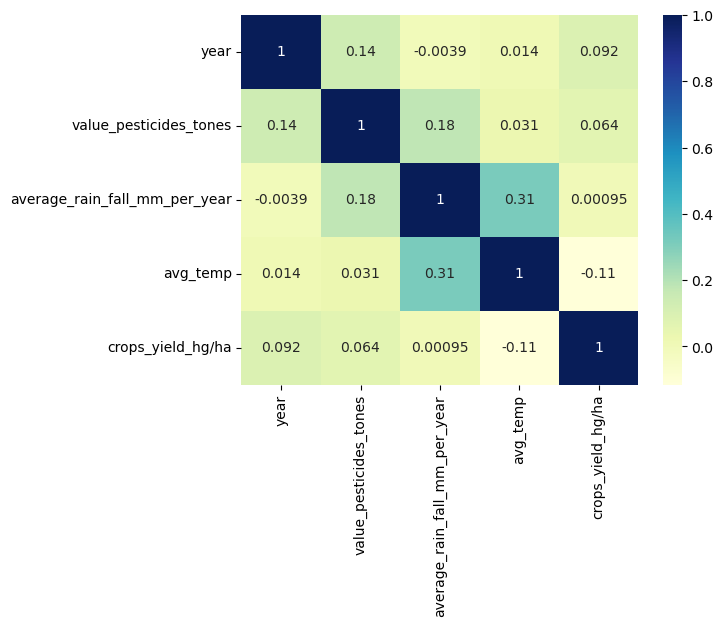

In [69]:
dataplot=sns.heatmap(df_new.corr(),cmap="YlGnBu", annot=True)

- The above correlation plot shows that 
- Between all other numerical variables, average_rain_fall_mm_per_year and avg_temp has weakly postive correlation (0.31<0.5) 

#### 3.2 Relationship between numerical features and categorical features

##### i. Relationship between item_crops and other numerical features

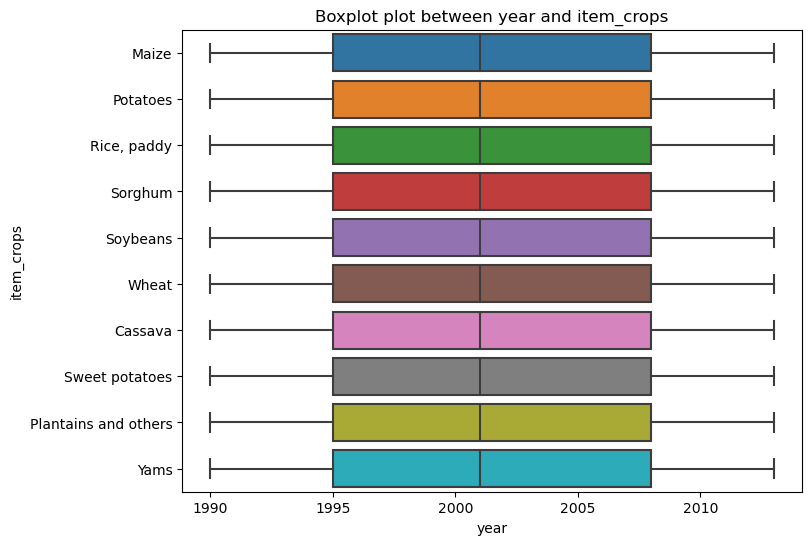

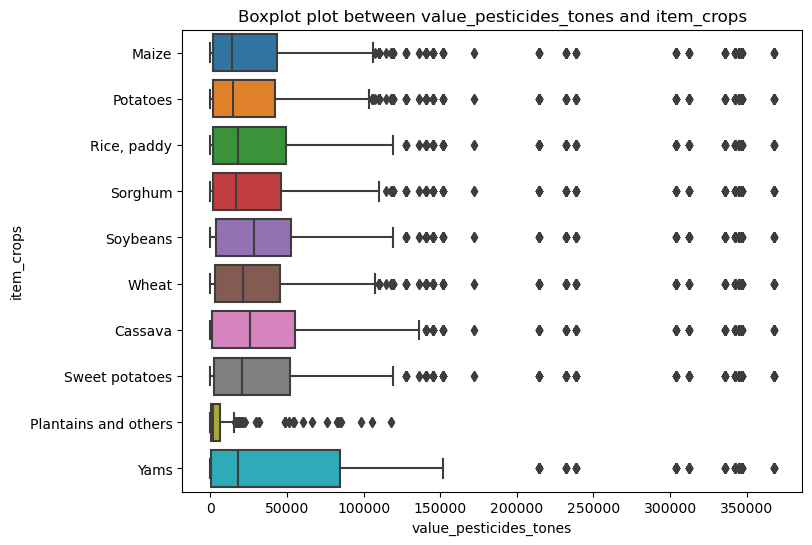

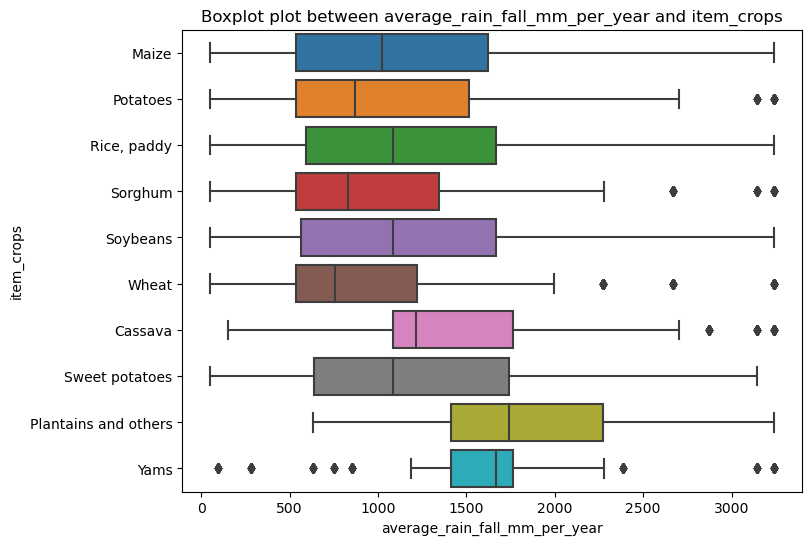

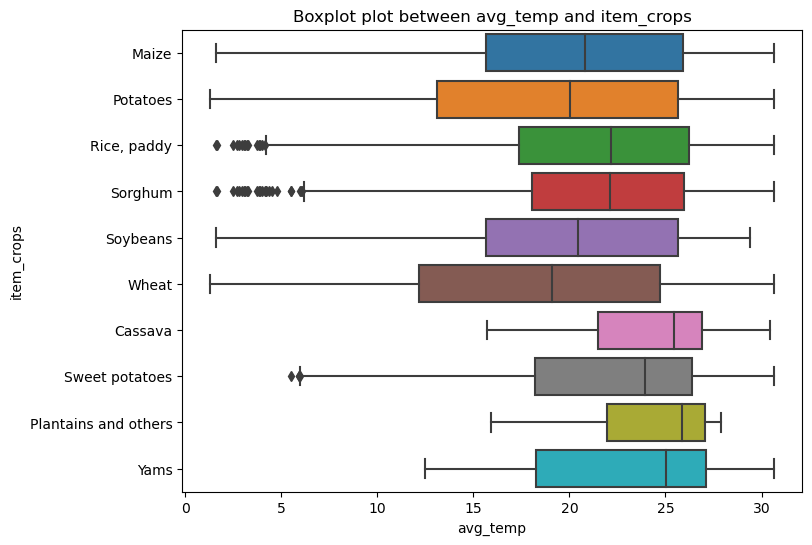

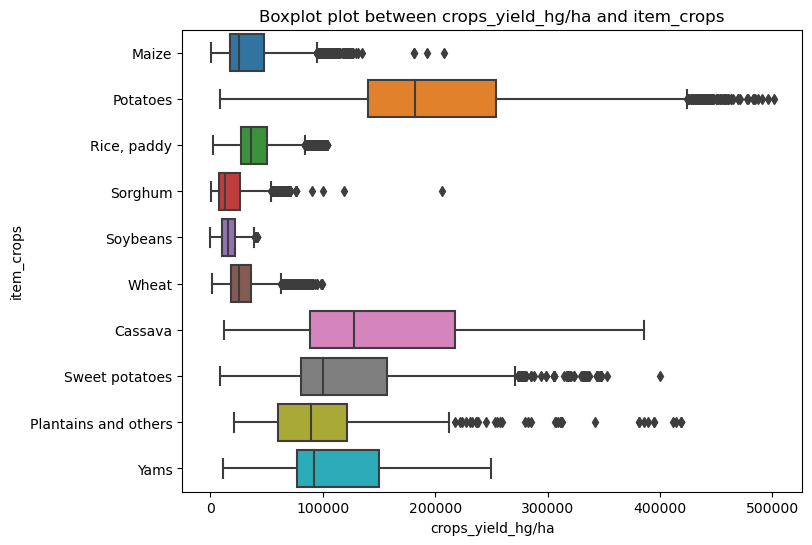

In [70]:
# There are 10 categories in the item_crops
for col in numerical_feature.columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df_new, x=col , y="item_crops")
    plt.title(f"Boxplot plot between {col} and item_crops")
    plt.show()

- Based on the above boxplots,
    - There is no relationship between year and item_crops.
    - Except for the year variable, all other numerical features have a relationship with item_crops, because when the category in item_crops changes, the distribution of numerical features changes.

##### ii. Relationship between area and other numerical features

In [71]:
# There are more than 100 categories in the area
# It is not useful to create boxplot for those 100 categories
# Therefore, following statistics will useful to explain the relationship between categories of area and numerical variable
# However, it is hard to compare 100 caregories, thus top 10 countries consider.
# If these statistics measure changes for each categories, we can conclude that there is a relationship between country and respective numerical variable

for col in numerical_feature.columns[1:]:
    category_stats = df_new.groupby('area')[col].agg(['mean', 'median', 'std'])
    print("How Statistical measures of {} are changing for each country".format(col))
    display(category_stats.head(10))

How Statistical measures of value_pesticides_tones are changing for each country


,mean,median,std
area,,,
Albania,601.238788,565.82,397.138194
Algeria,4226.762982,1828.92,5287.943325
Angola,56.701220,40.00,60.436798
Argentina,67929.460000,63700.17,35116.010259
Armenia,138.646190,88.77,104.117554
Australia,33115.119565,34091.00,8743.182323
Austria,3587.785417,3531.80,356.118689
Azerbaijan,219.953707,148.68,125.124591
Bahamas,377.227808,375.89,102.701300


How Statistical measures of average_rain_fall_mm_per_year are changing for each country


,mean,median,std
area,,,
Albania,1485.0,1485.0,0.0
Algeria,89.0,89.0,0.0
Angola,1010.0,1010.0,0.0
Argentina,591.0,591.0,0.0
Armenia,562.0,562.0,0.0
Australia,534.0,534.0,0.0
Austria,1110.0,1110.0,0.0
Azerbaijan,447.0,447.0,0.0
Bahamas,1292.0,1292.0,0.0


How Statistical measures of avg_temp are changing for each country


,mean,median,std
area,,,
Albania,16.300101,16.370,0.484994
Algeria,17.484825,17.590,0.515313
Angola,24.311341,24.255,0.233710
Argentina,17.708478,17.690,0.476390
Armenia,9.580952,9.580,0.888425
Australia,16.593696,17.200,2.799598
Austria,9.121979,9.170,0.683358
Azerbaijan,12.439828,12.660,0.850796
Bahamas,25.483014,25.460,0.304980


How Statistical measures of crops_yield_hg/ha are changing for each country


,mean,median,std
area,,,
Albania,57692.282828,31862.0,61069.164092
Algeria,58872.491228,23802.5,73936.094483
Angola,34893.676829,13577.5,37852.191697
Argentina,89304.434783,57267.0,77586.575464
Armenia,71811.111111,40303.0,61151.686646
Australia,112951.409938,53856.0,123047.297552
Austria,113044.354167,66049.5,105146.785577
Azerbaijan,39727.413793,25513.5,42497.706525
Bahamas,64281.561644,38000.0,51124.103922


- Considering the above statistical measures of the top 10 values,
    - We can conclude that there is a relationship between the area and all the numerical variables because when the country changes, statistical measures of all numerical features change.

##### iii. Relationship between categorical features

In [72]:
area_cropItem = pd.crosstab(categorical_feature["area"],categorical_feature["item_crops"])

In [73]:
area_cropItem.head(50)

item_crops,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
area,,,,,,,,,,
Albania,0,23,0,23,4,3,23,0,23,0
Algeria,0,23,0,23,23,22,0,0,23,0
Angola,23,23,0,23,23,13,13,23,23,0
Argentina,46,46,0,46,46,46,46,46,46,0
Armenia,0,21,0,21,0,0,0,0,21,0
Australia,0,138,0,138,138,138,138,138,138,0
Austria,0,23,0,23,0,4,23,0,23,0
Azerbaijan,0,21,0,21,21,12,20,0,21,0
Bahamas,23,23,4,0,0,0,0,23,0,0


In [74]:
area_cropItem.tail(50)

item_crops,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
area,,,,,,,,,,
Latvia,0,0,0,21,0,0,0,0,21,0
Lebanon,0,23,0,23,0,23,0,0,23,0
Lesotho,0,23,0,23,0,23,0,0,23,0
Libya,0,46,0,46,0,0,0,0,46,0
Lithuania,0,21,0,21,0,0,0,0,21,0
Madagascar,23,23,0,23,23,23,23,23,23,0
Malawi,23,23,23,23,23,23,10,0,23,0
Malaysia,23,23,0,0,23,0,1,23,0,0
Mali,23,23,0,23,23,23,23,23,23,23


- According to the cross table above of area and item_crops,
    - The top 50 and the bottom 50 rows show that there is not much difference in the counts when the country changes. Only very few countries' counts are changing, such as Turkey and Albania.

#### 4. Briefly explain your findings / observations in terms of feature correlations and data quality issues 

- All the explanations are given under each section.
